In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import random
import imageio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense,Activation
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

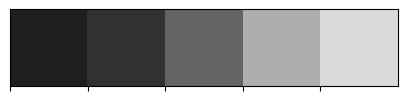

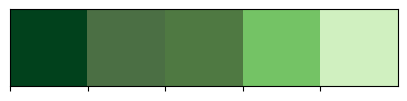

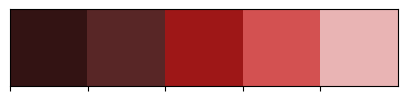

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

### **Resize Image and Normalization**

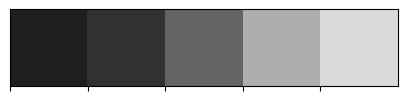

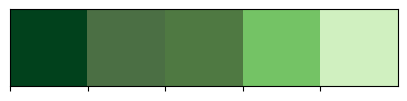

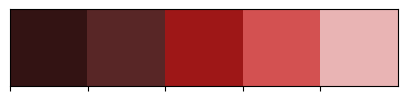

In [ ]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

sns.palplot(colors_dark)
sns.palplot(colors_green)
sns.palplot(colors_red)

In [ ]:
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

### ** Data Visualization and Variation**

In [ ]:
data_directory = '/content/drive/MyDrive/ lung cancer dataset'
size_data = {}
for i in categories:
    path = os.path.join(data_directory, i)
    class_num = categories.index(i)
    temp_dict = {}
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        height, width, channels = imageio.imread(filepath).shape
        if str(height) + ' x ' + str(width) in temp_dict:
            temp_dict[str(height) + ' x ' + str(width)] += 1
        else:
            temp_dict[str(height) + ' x ' + str(width)] = 1

    size_data[i] = temp_dict

size_data

<ipython-input-8-0b505d10ac57>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  height, width, channels = imageio.imread(filepath).shape


{'Bengin cases': {'512 x 512': 120},
 'Malignant cases': {'512 x 512': 501,
  '512 x 801': 28,
  '512 x 623': 31,
  '404 x 511': 1},
 'Normal cases': {'512 x 512': 415, '331 x 506': 1}}

Bengin cases


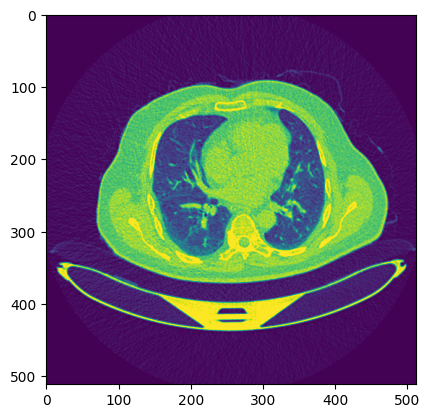

Malignant cases


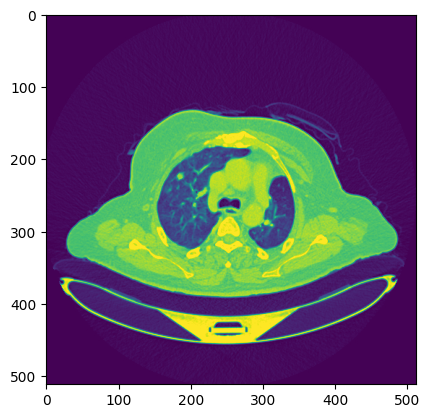

Normal cases


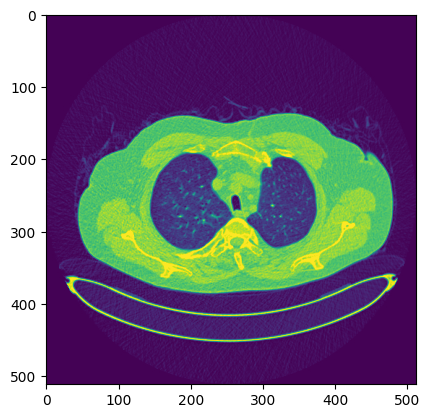

In [ ]:

for i in categories:
    path = os.path.join(data_directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        print(i)
        img = cv2.imread(filepath, 0)
        plt.imshow(img)
        plt.show()
        break

### **Image Preprocessing**


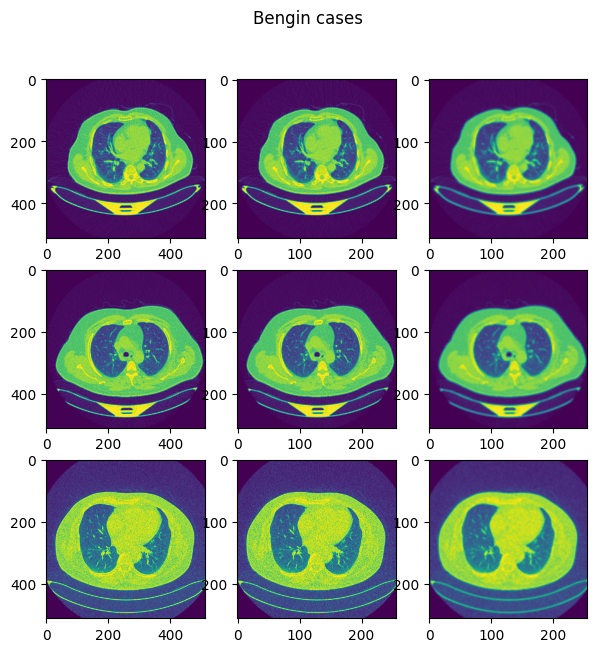

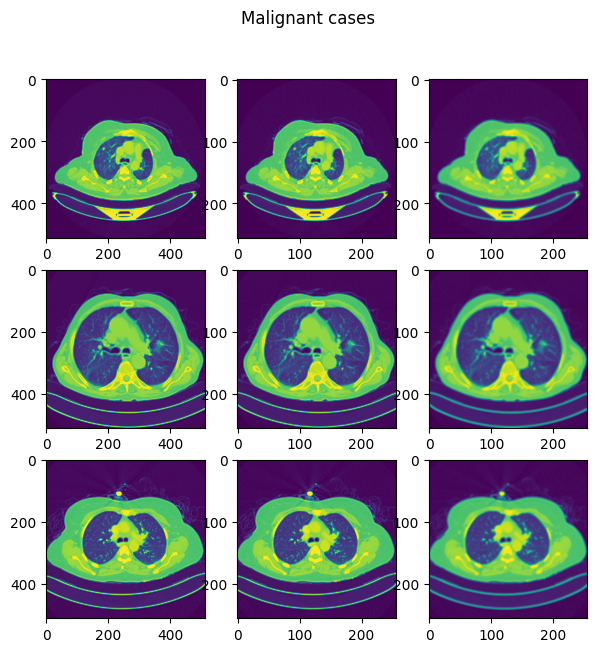

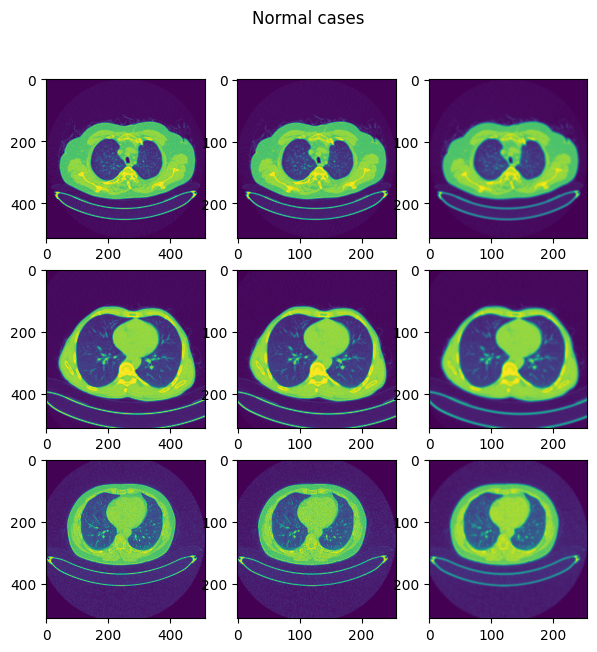

In [ ]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(7,7))
    fig.suptitle(i)

    path = os.path.join(data_directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)

        img0 = cv2.resize(img, (img_size, img_size))

        img1 = cv2.GaussianBlur(img0, (5,5), 0)

        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break

plt.show()

### **Data Preparation**

In [ ]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(data_directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])

random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)

print('X length:', len(X))
print('y counts:', Counter(y))
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})


## **Data Splitting**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=10, stratify=y)

print(len(X_train), X_train.shape)
print(len(X_valid), X_valid.shape)

822 (822, 256, 256, 1)
275 (275, 256, 256, 1)


### **Applying Smote**

In [ ]:
print(Counter(y_train), Counter(y_valid))

Counter({1: 420, 2: 312, 0: 90}) Counter({1: 141, 2: 104, 0: 30})


In [ ]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

822 (822, 256, 256, 1)
822 (822, 65536)


In [ ]:
print('Before SMOTE:', Counter(y_train))
smote = SMOTE()
X_train_sampled, y_train_sampled = smote.fit_resample(X_train, y_train)
print('After SMOTE:', Counter(y_train_sampled))

Before SMOTE: Counter({1: 420, 2: 312, 0: 90})
After SMOTE: Counter({2: 420, 1: 420, 0: 420})


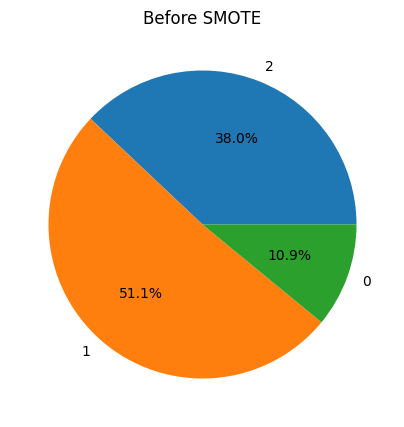

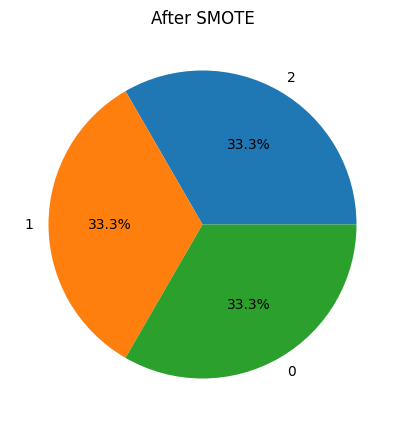

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Before SMOTE")
plt.pie(Counter(y_train).values(), labels=Counter(y_train).keys(), autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(5,5))
plt.title("After SMOTE")
plt.pie(Counter(y_train_sampled).values(), labels=Counter(y_train_sampled).keys(), autopct='%1.1f%%')
plt.show()


In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

822 (822, 256, 256, 1)
1260 (1260, 256, 256, 1)


In [ ]:
model1 = Sequential()

model1.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(16))
model1.add(Dense(3, activation='softmax'))



In [ ]:
model1.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 64)      640       
                                                                 
 activation_13 (Activation)  (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 246016)          

In [ ]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

history1 = model1.fit(X_train_sampled, y_train_sampled, batch_size=8 , epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
158/158 [==============================] - 6s 26ms/step - loss: 0.6969 - accuracy: 0.8079 - val_loss: 0.1302 - val_accuracy: 0.9709
Epoch 2/10
158/158 [==============================] - 3s 21ms/step - loss: 0.0448 - accuracy: 0.9889 - val_loss: 0.0629 - val_accuracy: 0.9818
Epoch 3/10
158/158 [==============================] - 3s 21ms/step - loss: 0.0217 - accuracy: 0.9976 - val_loss: 0.0531 - val_accuracy: 0.9782
Epoch 4/10
158/158 [==============================] - 3s 21ms/step - loss: 0.0172 - accuracy: 0.9976 - val_loss: 0.0515 - val_accuracy: 0.9818
Epoch 5/10
158/158 [==============================] - 4s 23ms/step - loss: 0.0151 - accuracy: 0.9952 - val_loss: 0.0676 - val_accuracy: 0.9818
Epoch 6/10
158/158 [==============================] - 3s 21ms/step - loss: 0.0201 - accuracy: 0.9960 - val_loss: 0.0434 - val_accuracy: 0.9891
Epoch 7/10
158/158 [==============================] - 3s 21ms/step - loss: 0.0071 - accuracy: 0.9976 - val_loss: 0.0641 - val_accuracy: 0.9855

In [ ]:
y_pred = model1.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))


9/9 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        30
           1       0.99      0.99      0.99       141
           2       0.96      0.99      0.98       104

    accuracy                           0.98       275
   macro avg       0.99      0.97      0.98       275
weighted avg       0.98      0.98      0.98       275

[[ 28   0   2]
 [  0 139   2]
 [  0   1 103]]


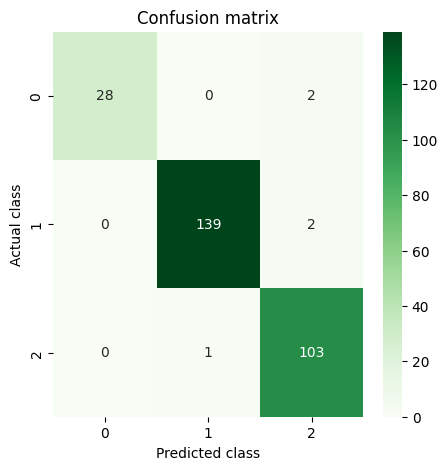

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_valid, y_pred_bool), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

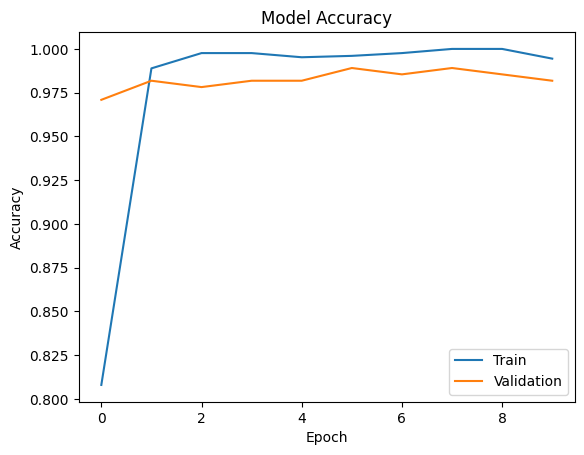

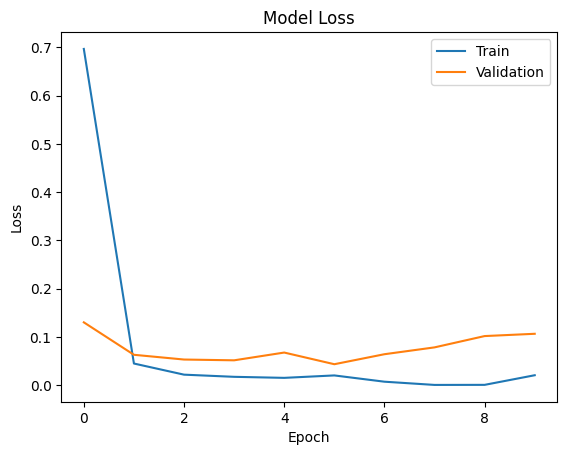

In [ ]:
plt.plot(history1.history['accuracy'], label='Train')
plt.plot(history1.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history1.history['loss'], label='Train')
plt.plot(history1.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### **Model Building with Class Weighted Approach**

In [ ]:
new_weights = {
    0: X_train.shape[0]/(3*Counter(y_train)[0]),
    1: X_train.shape[0]/(3*Counter(y_train)[1]),
    2: X_train.shape[0]/(3*Counter(y_train)[2]),
}

new_weights

{0: 3.0444444444444443, 1: 0.6523809523809524, 2: 0.8782051282051282}

In [ ]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(16))
model2.add(Dense(3, activation='softmax'))

model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 254, 254, 64)      640       
                                                                 
 activation_14 (Activation)  (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_14 (Flatten)        (None, 246016)          

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(X_train, y_train, batch_size=8, epochs=10, validation_data=(X_valid, y_valid), class_weight=new_weights)

Epoch 1/10
103/103 [==============================] - 4s 28ms/step - loss: 1.2544 - accuracy: 0.6326 - val_loss: 0.5530 - val_accuracy: 0.7273
Epoch 2/10
103/103 [==============================] - 2s 22ms/step - loss: 0.2275 - accuracy: 0.9319 - val_loss: 0.1739 - val_accuracy: 0.9382
Epoch 3/10
103/103 [==============================] - 2s 22ms/step - loss: 0.0897 - accuracy: 0.9830 - val_loss: 0.0632 - val_accuracy: 0.9782
Epoch 4/10
103/103 [==============================] - 2s 21ms/step - loss: 0.0511 - accuracy: 0.9891 - val_loss: 0.0654 - val_accuracy: 0.9818
Epoch 5/10
103/103 [==============================] - 2s 22ms/step - loss: 0.0796 - accuracy: 0.9842 - val_loss: 0.1015 - val_accuracy: 0.9818
Epoch 6/10
103/103 [==============================] - 2s 23ms/step - loss: 0.0227 - accuracy: 0.9976 - val_loss: 0.0186 - val_accuracy: 0.9891
Epoch 7/10
103/103 [==============================] - 2s 23ms/step - loss: 0.0669 - accuracy: 0.9842 - val_loss: 0.0461 - val_accuracy: 0.9818

In [ ]:
y_pred = model2.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))


9/9 [==============================] - 0s 23ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.99      0.98      0.98       141
           2       0.97      0.98      0.98       104

    accuracy                           0.98       275
   macro avg       0.97      0.98      0.97       275
weighted avg       0.98      0.98      0.98       275



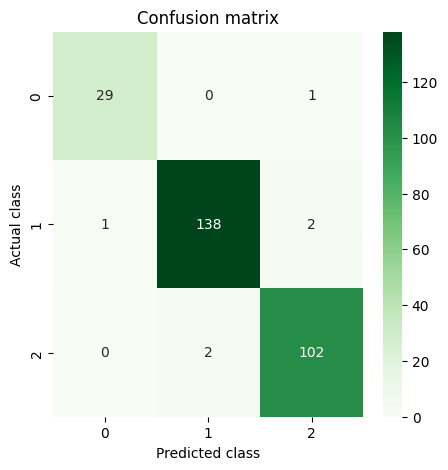

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_valid, y_pred_bool), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()

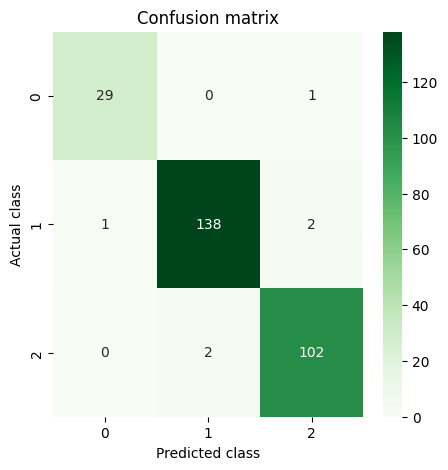

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_valid, y_pred_bool), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()


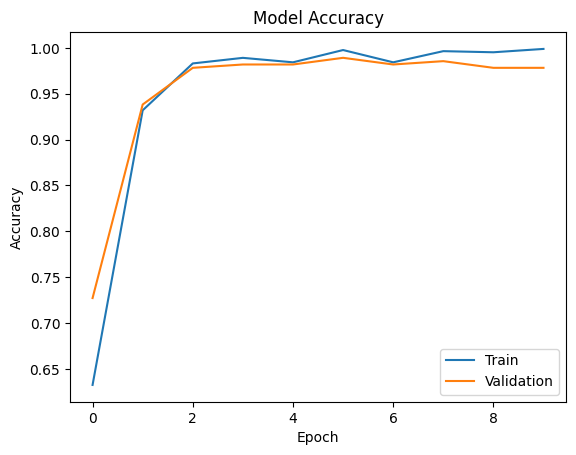

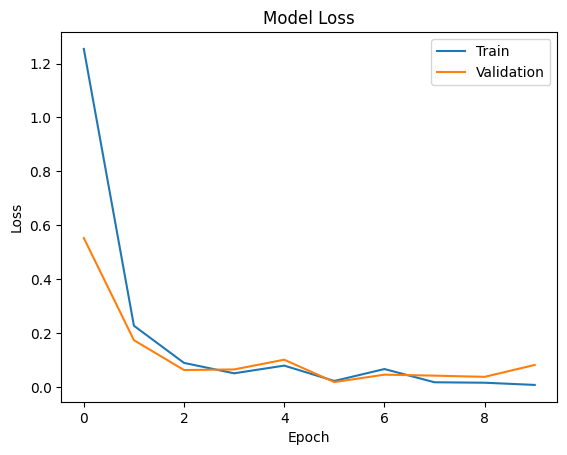

In [ ]:
plt.plot(history2.history['accuracy'], label='Train')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history2.history['loss'], label='Train')
plt.plot(history2.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

### **Data Augmentation**

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True,)
val_datagen = ImageDataGenerator()

In [ ]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8)
val_generator = val_datagen.flow(X_valid, y_valid, batch_size=8)

In [ ]:
model3 = Sequential()

model3.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(16))
model3.add(Dense(3, activation='softmax'))

model3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 254, 254, 64)      640       
                                                                 
 activation_15 (Activation)  (None, 254, 254, 64)      0         
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 127, 127, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 125, 125, 64)      36928     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_15 (Flatten)        (None, 246016)          

In [ ]:
model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history3 = model3.fit_generator(train_generator, epochs=10, validation_data=val_generator, class_weight=new_weights)


Epoch 1/10


<ipython-input-182-a29a3e957236>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model3.fit_generator(train_generator, epochs=10, validation_data=val_generator, class_weight=new_weights)


103/103 [==============================] - 4s 25ms/step - loss: 1.4384 - accuracy: 0.5316 - val_loss: 0.9640 - val_accuracy: 0.5927
Epoch 2/10
103/103 [==============================] - 2s 22ms/step - loss: 0.8407 - accuracy: 0.6131 - val_loss: 0.8011 - val_accuracy: 0.6509
Epoch 3/10
103/103 [==============================] - 2s 22ms/step - loss: 0.6304 - accuracy: 0.7591 - val_loss: 0.7413 - val_accuracy: 0.6655
Epoch 4/10
103/103 [==============================] - 2s 24ms/step - loss: 0.4307 - accuracy: 0.8139 - val_loss: 0.4102 - val_accuracy: 0.8364
Epoch 5/10
103/103 [==============================] - 3s 25ms/step - loss: 0.2879 - accuracy: 0.8856 - val_loss: 0.3298 - val_accuracy: 0.8655
Epoch 6/10
103/103 [==============================] - 2s 22ms/step - loss: 0.2220 - accuracy: 0.9185 - val_loss: 0.3044 - val_accuracy: 0.8727
Epoch 7/10
103/103 [==============================] - 2s 22ms/step - loss: 0.1727 - accuracy: 0.9513 - val_loss: 0.3678 - val_accuracy: 0.8691
Epoch 8/10

In [ ]:
y_pred = model3.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_valid, y_pred_bool))


9/9 [==============================] - 0s 17ms/step
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.98      0.94      0.96       141
           2       0.91      0.94      0.92       104

    accuracy                           0.94       275
   macro avg       0.92      0.93      0.92       275
weighted avg       0.94      0.94      0.94       275



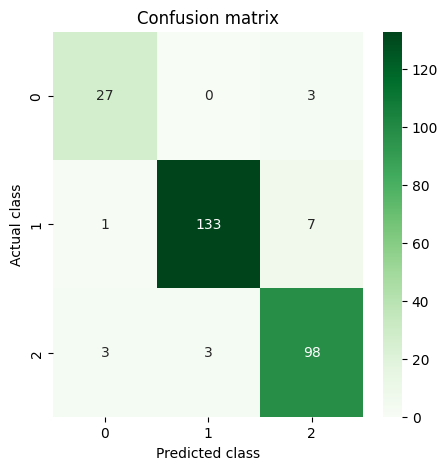

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_valid, y_pred_bool), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion matrix')
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.show()


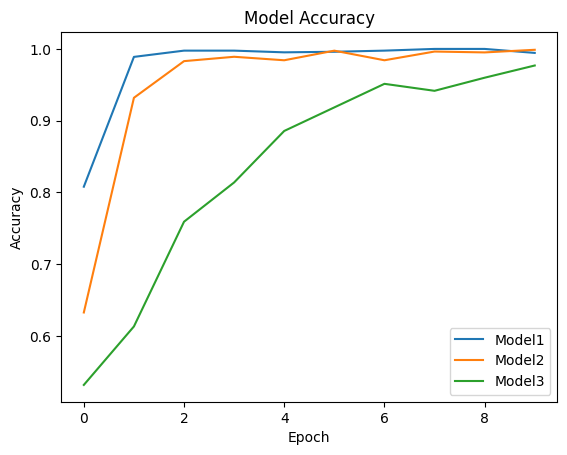

In [ ]:
plt.plot(history1.history['accuracy'], label='Model1')
plt.plot(history2.history['accuracy'], label='Model2')
plt.plot(history3.history['accuracy'], label='Model3')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()